<a href="https://colab.research.google.com/github/pingao2019/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/PingAo_Copy_of_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



![Bayes Theorem Drug Test Example](https://wikimedia.org/api/rest_v1/media/math/render/svg/95c6524a3736c43e4bae139713f3df2392e6eda9)

In [2]:
p_pos_user=1
p_user=1/1000
p_pos_nonuser=0.08
p_nonuser=1-p_user
print('probablity positive given user', p_pos_user)
print('probablity of user', p_user)
print('probablity positive given nonuser', p_pos_nonuser)
print('probablity of nonuser', p_nonuser)

probablity positive given user 1
probablity of user 0.001
probablity positive given nonuser 0.08
probablity of nonuser 0.999


In [7]:
posterior_probality= p_pos_user*p_user/(p_pos_user*p_user+p_pos_nonuser*p_nonuser )
print(posterior_probality)

0.012357884330202669


So the probability that a person is drunk after one positive breathalyzer tes is only 1.2357884330202669%

In [11]:
#f prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):
p_pos_user=1
p_user=0.012357
p_pos_nonuser=0.08
p_nonuser=1-p_user
print('probablity positive given user', p_pos_user)
print('probablity of user', p_user)
print('probablity positive given nonuser', p_pos_nonuser)
print('probablity of nonuser', p_nonuser)


probablity positive given user 1
probablity of user 0.012357
probablity positive given nonuser 0.08
probablity of nonuser 0.987643


In [12]:
posterior_probality= p_pos_user*p_user/(p_pos_user*p_user+p_pos_nonuser*p_nonuser )
print(posterior_probality)



0.13524363554855484


In [14]:
p_pos_user=1
p_user=0.13524363554855484
p_pos_nonuser=0.08
p_nonuser=1-p_user

posterior_probality= p_pos_user*p_user/(p_pos_user*p_user+p_pos_nonuser*p_nonuser )
print(posterior_probality)

0.6615834726565201


In [15]:
p_pos_user=1
p_user=0.6615834726565201
p_pos_nonuser=0.08
p_nonuser=1-p_user

posterior_probality= p_pos_user*p_user/(p_pos_user*p_user+p_pos_nonuser*p_nonuser )
print(posterior_probality)


0.9606867711316036


So 4 times positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit.

Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:

In [38]:
#frequentist approach
import matplotlib.pyplot as plt

from scipy import stats
import numpy as np
np.random.seed(20)
coinflips= np.random.binomial(n=1, p=.5, size=80)
print(coinflips)


[1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0
 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1
 0 1 1 1 0 1]


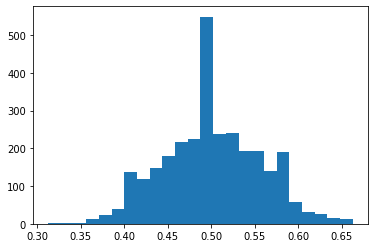

In [39]:
sample_means = []
for x in range(0, 3000):
  coinflips = np.random.binomial(n=1, p=.5, size=80)
  sample_means.append(coinflips.mean())
ax = plt.hist(sample_means, bins=24)

In [35]:
def confidence_interval(coinflips, confidence=.05):
  n=len(coinflips)
  mean=sum(coinflips)/n
  stderr=stats.sem(coinflips)
  interval=stderr*stats.t.ppf((1+confidence)/2.0,n-1)
  return (mean, mean-interval, mean+interval)

confidence_interval(coinflips)


(0.6, 0.5965327408185253, 0.6034672591814747)

In [33]:
# bayesian way:
bayesians_confidence_interval, _, _ =stats.bayes_mvs(coinflips)
print(bayesians_confidence_interval)


Mean(statistic=0.45, minmax=(0.35684111052518425, 0.5431588894748157))


#Conclusion:above two ways get same results as long as the sample size is big enough.

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!